# 1- Imports necessários / Required imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 2- Classe de Classificação de Métricas / Classification Metrics Class

In [2]:
class ClassificationMetrics:
    """
    Classe para calcular métricas de avaliação para modelos de classificação

    Class to calculate evaluation metrics for classification models
    """

    def __init__(self, tp, tn, fp, fn):
        self.tp = tp
        self.tn = tn
        self.fp = fp
        self.fn = fn
        self.n = tp + tn + fp + fn

    def recall(self):
        return self.tp / (self.tp + self.fn) if (self.tp + self.fn) > 0 else 0

    def specificity(self):
        return self.tn / (self.fp + self.tn) if (self.fp + self.tn) > 0 else 0

    def accuracy(self):
        return (self.tp + self.tn) / self.n if self.n > 0 else 0

    def precision(self):
        return self.tp / (self.tp + self.fp) if (self.tp + self.fp) > 0 else 0

    def f_score(self):
        p = self.precision()
        r = self.recall()
        return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

    def calculate_all(self):
        return {
            'Recall': self.recall(),
            'Specificity': self.specificity(),
            'Accuracy': self.accuracy(),
            'Precision': self.precision(),
            'F-score': self.f_score()
        }

# 3- Função auxiliar para calcular métricas / Helper function to calculate metrics

 Funções y_true e y_pred

In [3]:
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, consider class "1" as positive
    if cm.shape == (2,2):
        tp, fn, fp, tn = cm[1,1], cm[1,0], cm[0,1], cm[0,0]
        metrics = ClassificationMetrics(tp, tn, fp, fn)
        return metrics.calculate_all(), cm
    else:
        # For multi-class, only global accuracy is considered
        accuracy = (y_true == y_pred).mean()
        return {"Accuracy": accuracy}, cm

# 4- Carregar Dataset e dividir treino e teste / Load Dataset and split train and test

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Iris dataset loaded!")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(set(y))}")

Iris dataset loaded!
Dataset shape: (150, 4)
Number of classes: 3


# 5- Treina vários modelos e compare / Train multiple models and compare

In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = {}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics, cm = calculate_metrics(y_test, y_pred)
    results[name] = metrics
    confusion_matrices[name] = cm

# 6- Compare os resultados na tabela / Compare results in table

In [6]:
df_results = pd.DataFrame(results).T
df_results

,Accuracy
Logistic Regression,0.933333
Decision Tree,0.911111
Random Forest,0.888889
KNN,0.977778
SVM,0.955556


# 7- Vizualização de métricas / Visualization of metrics

<Figure size 1000x600 with 0 Axes>

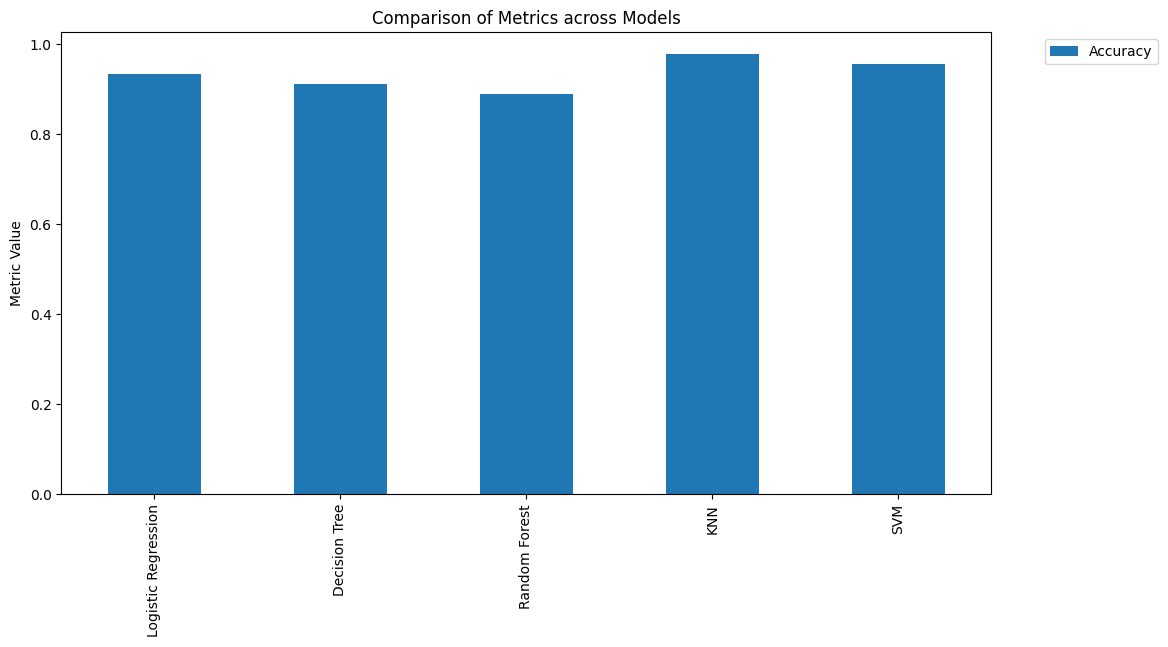

In [7]:
plt.figure(figsize=(10,6))
df_results.plot(kind="bar", figsize=(12,6))
plt.title("Comparison of Metrics across Models")
plt.ylabel("Metric Value")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

# 8- Gráfico da matriz de confusão de cada modelo / Confusion matrix for each model

8.1- Matriz de Confusão - Regressão Logística / Confusion Matrix - Logistic Regression



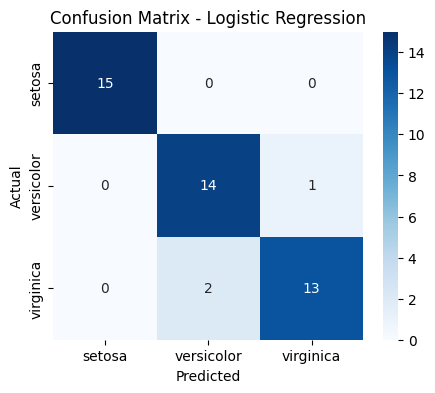

In [9]:
cm = confusion_matrices["Logistic Regression"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

8.2- Matriz de Confusão - Árvore de Decisão / Confusion Matrix - Decision Tree






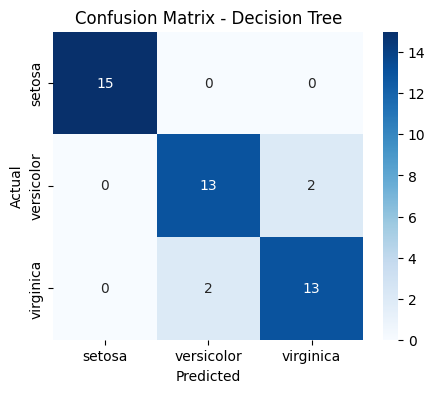

In [10]:
cm = confusion_matrices["Decision Tree"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

8.3- Matriz de Confusão - Floresta Aleatória / Confusion Matrix - Random Forest

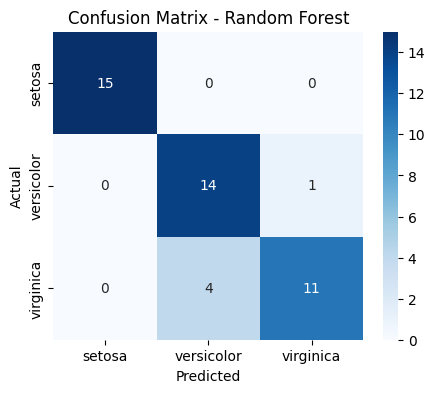

In [11]:
cm = confusion_matrices["Random Forest"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

8.4- Matriz de Confusão - KNN / Confusion Matrix - KNN

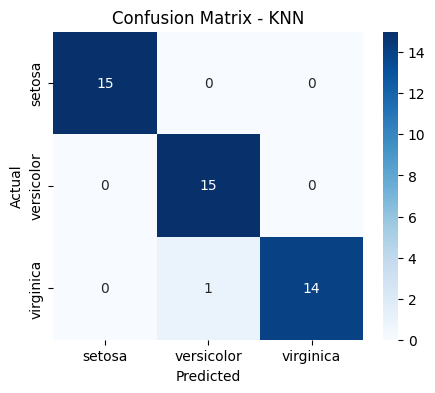

In [12]:
cm = confusion_matrices["KNN"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

8.5- Matriz de Confusão - SVM / Confusion Matrix - SVM

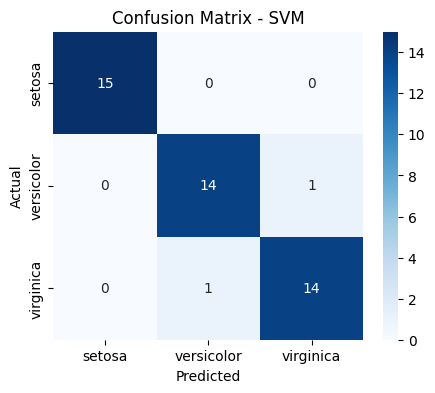

In [13]:
cm = confusion_matrices["SVM"]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()